# **檔案Import**

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = files.upload() # upload local files

Saving allbut.pl to allbut.pl
Saving mku.sh to mku.sh
Saving README to README
Saving u.data to u.data
Saving u.genre to u.genre
Saving u.info to u.info
Saving u.item to u.item
Saving u.occupation to u.occupation
Saving u.user to u.user
Saving u1.base to u1.base
Saving u1.test to u1.test
Saving u2.base to u2.base
Saving u2.test to u2.test
Saving u3.base to u3.base
Saving u3.test to u3.test
Saving u4.base to u4.base
Saving u4.test to u4.test
Saving u5.base to u5.base
Saving u5.test to u5.test
Saving ua.base to ua.base
Saving ua.test to ua.test
Saving ub.base to ub.base
Saving ub.test to ub.test


In [ ]:
# load the movie rating data into a dataframe
rating_header = ["user_id", "item_id", "rating", "timestamp"]
df = pd.read_csv("u.data", sep = '\t', header = None, names=rating_header)

# load the user data into a dataframe
user_header = ["user_id", "age", "gender", "occupation", "zip_code"]
users = pd.read_csv("u.user", sep = '|', header = None, names=user_header)

# load movie data into a dataframe
movie_header = ["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
         "unknown", "Action", "Adventure", "Animation","Children's", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
         "Romance", "Sci-Fi", "Thriller", "War", "Western"]
movies = pd.read_csv("u.item", sep = '|', header = None, encoding = 'latin1', names = movie_header)

# transfrom the users dataframe with numerical values (excluding zip_code)
users_num = users.copy()
users_num["gender"].replace(['F', 'M'],[0, 1], inplace=True) # replace F and M with 0 and 1, respectively
occupation = pd.read_csv("u.occupation", header = None)
occupation_list = occupation.values
users_num["occupation"].replace(occupation_list,list(range(0, len(occupation_list))), inplace=True)

In [ ]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
users_num.head()

,user_id,age,gender,occupation,zip_code
0,1,24,1,19,85711
1,2,53,0,13,94043
2,3,23,1,20,32067
3,4,24,1,19,43537
4,5,33,0,13,15213


# **Data analysis**

# **總人數年齡分布、男生/女生年齡分布**
observation:
1、男生總人數高於女性
2、平均年齡為34歲
3、最小與最大年齡分別為7歲與73歲

solution:以柱狀圖呈現總人數、男性與女性的年齡分布

          user_id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000


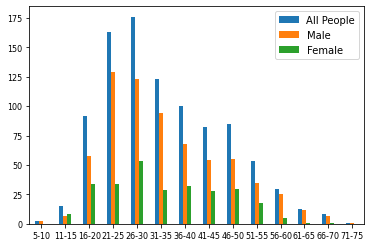

In [ ]:
from pandas.core.reshape.concat import all_indexes_same
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#平均年齡 / 最大、最小年齡
print(users.describe())
#總人數分布
all=users["age"]
bins=np.arange(5,80,5)
time1=pd.cut(all, bins, labels=[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])
df1=users.groupby(time1)["age"].count()
#男生分布
male=users[["gender","age"]]
male=male[male["gender"]=="M"]
m=male["age"]
time2=pd.cut(m, bins, labels=[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])
df2=male.groupby(time2)["age"].count()
#女生分布
female=users[["gender","age"]]
female=female[female["gender"]=="F"]
f=female["age"]
time3=pd.cut(f, bins, labels=[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])
df3=female.groupby(time3)["age"].count()

M = [2, 7, 58, 129, 123, 94, 68, 54, 55, 35, 25, 12, 7, 1]
F = [0, 8, 34, 34, 53, 29, 32, 28, 30, 18, 5, 1, 1, 0]
A = [2, 15, 92, 163, 176, 123, 100, 82, 85, 53, 30, 13, 8, 1]
ff = pd.DataFrame({'All People': A,
          'Male': M,
         'Female': F}, index=['5-10','11-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','71-75'])
ax = ff.plot.bar(rot=0,fontsize=8)

# **男/女 平均給分**
observation: 男女平均給分皆落在3.5左右，差異不大

solution:利用.mean()算出平均，並以條列呈現

In [ ]:
users_df = users[['user_id', 'gender']]
data_df = df[['user_id', 'rating']]

rating_df = pd.merge(users_df, data_df)

rating_df_mean = rating_df.groupby(['gender', 'user_id']).mean()
#print(rating_df_mean)

print(rating_df_mean.groupby(['gender']).mean())

          rating
gender          
F       3.587179
M       3.588604


In [ ]:
#將df / users / movies 合併為data
data=pd.merge(pd.merge(df,users),movies)
data.head()

,user_id,item_id,rating,timestamp,age,gender,occupation,zip_code,title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#過濾掉評分數據不夠300條的電影
mean_ratings=data.pivot_table('rating',index=["title","item_id"],columns=["gender"],aggfunc='mean')
#分組
ratings_by_title = data.groupby('title').size()
#數據過濾
active_titles = ratings_by_title.index[ratings_by_title >= 300]
#數據篩選
mean_ratings = mean_ratings.loc[active_titles]
print(mean_ratings)

gender                                                       F         M
title                                        item_id                    
Air Force One (1997)                         300      3.690476  3.606557
Back to the Future (1985)                    204      3.766667  3.857692
Chasing Amy (1997)                           246      3.848485  3.967033
                                             268      3.803279  3.788660
Contact (1997)                               258      3.686131  3.846774
E.T. the Extra-Terrestrial (1982)            423      3.839080  3.830986
Empire Strikes Back, The (1980)              172      3.978022  4.278986
English Patient, The (1996)                  286      3.809211  3.586626
Fargo (1996)                                 100      4.016000  4.201044
Forrest Gump (1994)                          69       3.772152  3.880165
Fugitive, The (1993)                         79       4.166667  4.011364
Full Monty, The (1997)                       269   

# **分析評分最高Top10 movies**
observation: 
前十名評分最高電影的屬性中，由多至少為'Action'(7),'Drama'(6),'Adventure'(4),'Romance'(4),'Thriller'(3),'Crime'(3),'Sci-Fi'(2),'War'(2),'Comedy'(1)

solution:以條列式呈現排名前十電影，以柱狀圖呈現屬性分布

title                             item_id
Star Wars (1977)                  50         8.643181
Silence of the Lambs, The (1991)  98         8.599310
Titanic (1997)                    313        8.510553
Godfather, The (1972)             127        8.467749
Raiders of the Lost Ark (1981)    174        8.385749
Princess Bride, The (1987)        173        8.266220
Empire Strikes Back, The (1980)   172        8.257007
Fargo (1996)                      100        8.217044
Fugitive, The (1993)              79         8.178030
Pulp Fiction (1994)               56         8.016667
Name: add, dtype: float64


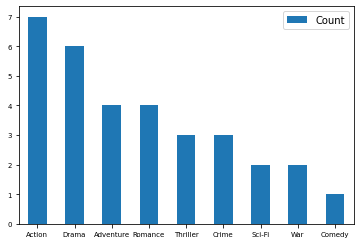

In [ ]:
mean_ratings['add'] = mean_ratings['M'] + mean_ratings['F']
top_10_ratings = mean_ratings.sort_values(by='add', ascending=False)[:10]
print(top_10_ratings["add"])
mm=movies.drop(columns=['title','release_date','video_release_date','IMDb_URL'])
top=[50,98,313,127,174,173,172,100,79,56]
filt = (mm['item_id'].isin(top)) 
a=mm.loc[filt].sum(axis='rows').sort_values()
#print(a)
A=[7,6,4,4,3,3,2,2,1]
ff = pd.DataFrame({'Count': A}, index=['Action','Drama','Adventure','Romance','Thriller','Crime','Sci-Fi','War','Comedy'])
ax = ff.plot.bar(rot=0,fontsize=7)


# **女性喜愛電影排名Top10、分析女性喜愛電影Top10**
observation: 女性前十名評分最高電影的屬性中，由多至少為'Action(7)','Romance'(4),'Adventure'(4),'Drama'(4),'Thriller'(3),'War'(2),'Crime'(2),'Comedy'(2),'Sci-Fi'(2)，其中'Action'最為顯著

solution:以條列式呈現女性排名前十電影，以柱狀圖呈現屬性分布

title                             item_id
Silence of the Lambs, The (1991)  98         4.320000
Titanic (1997)                    313        4.278846
Star Wars (1977)                  50         4.245033
Fugitive, The (1993)              79         4.166667
Godfather, The (1972)             127        4.133333
Raiders of the Lost Ark (1981)    174        4.084211
Princess Bride, The (1987)        173        4.044944
Full Monty, The (1997)            269        4.020408
Fargo (1996)                      100        4.016000
Return of the Jedi (1983)         181        4.008065
Name: F, dtype: float64


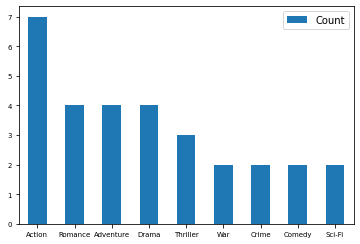

In [ ]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)[:10]
print(top_female_ratings["F"])
mm=movies.drop(columns=['title','release_date','video_release_date','IMDb_URL'])
top=[98,313,50,79,127,174,173,269,100,181]
filt = (mm['item_id'].isin(top))  
a=mm.loc[filt].sum(axis='rows').sort_values()
#print(a)
A=[7,4,4,4,3,2,2,2,2]
ff = pd.DataFrame({'Count': A}, index=['Action','Romance','Adventure','Drama','Thriller','War','Crime','Comedy','Sci-Fi'])
ax = ff.plot.bar(rot=0,fontsize=7)


# **男性喜愛電影排名Top10、分析男性喜愛電影Top10**
observation:男性前十名評分最高電影的屬性中，由多至少為'Action'(6),'Drama'(6),'Adventure'(4),'Romance'(4),'Crime'(3),'Sci-Fi'(2),'Comedy'(2),'Thriller'(2),'War'(2)，其中'Action'與'Drama'最為顯著

solution:以條列式呈現男性排名前十電影，以柱狀圖呈現屬性分布

title                                   item_id
Star Wars (1977)                        50         4.398148
Godfather, The (1972)                   127        4.334416
Raiders of the Lost Ark (1981)          174        4.301538
Silence of the Lambs, The (1991)        98         4.279310
Empire Strikes Back, The (1980)         172        4.278986
Titanic (1997)                          313        4.231707
Princess Bride, The (1987)              173        4.221277
Fargo (1996)                            100        4.201044
Monty Python and the Holy Grail (1974)  168        4.120000
Pulp Fiction (1994)                     56         4.100000
Name: M, dtype: float64


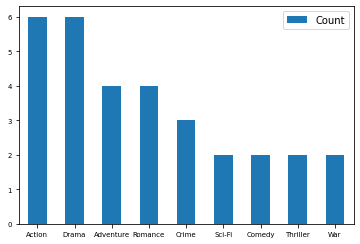

In [ ]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)[:10]
print(top_male_ratings["M"])
mm=movies.drop(columns=['title','release_date','video_release_date','IMDb_URL'])
top=[50,127,174,98,172,313,173,100,168,56]
filt = (mm['item_id'].isin(top))   
a=mm.loc[filt].sum(axis='rows').sort_values()
#print(a)
A=[6,6,4,4,3,2,2,2,2]
ff = pd.DataFrame({'Count': A}, index=['Action','Drama','Adventure','Romance','Crime','Sci-Fi','Comedy','Thriller','War'])
ax = ff.plot.bar(rot=0,fontsize=7)

# **男性和女性觀衆分歧最大的前10電影**
observation:
1、男女平均評分相差最大為0.5分
2、可得知男、女喜好最大不同的電影

solution:
將每部電影(男性平均評分-女性平均評分)由大而小排序
女性喜歡，而男性評價較低:排序最小的後10部電影
男性喜歡，而女性評價較低:排序最大的前10部電影

以條列呈現

女性喜歡，而男性評價較低

In [ ]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by='diff')
#女性喜歡，而男性評價較低
sorted_by_diff[:10]

,gender,F,M,add,diff
title,item_id,,,,
Independence Day (ID4) (1996),121,3.688679,3.356037,7.044716,-0.332642
"Rock, The (1996)",117,3.879121,3.634146,7.513267,-0.244975
Mission: Impossible (1996),405,3.487179,3.263158,6.750337,-0.224022
"English Patient, The (1996)",286,3.809211,3.586626,7.395837,-0.222584
Star Trek: First Contact (1996),222,3.835616,3.616438,7.452055,-0.219178
"Saint, The (1997)",748,3.247059,3.077922,6.324981,-0.169137
Willy Wonka and the Chocolate Factory (1971),151,3.752688,3.583691,7.336379,-0.168997
"Fugitive, The (1993)",79,4.166667,4.011364,8.178030,-0.155303
"Full Monty, The (1997)",269,4.020408,3.884793,7.905201,-0.135616


男性喜歡，而女性評價較低

In [ ]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by='diff')
#男性喜歡，而女性評價較低
sorted_by_diff[::-1][:10]

,gender,F,M,add,diff
title,item_id,,,,
"Terminator, The (1984)",195,3.524590,4.037500,7.562090,0.512910
"Empire Strikes Back, The (1980)",172,3.978022,4.278986,8.257007,0.300964
Twelve Monkeys (1995),7,3.560976,3.861290,7.422266,0.300315
Monty Python and the Holy Grail (1974),168,3.863636,4.120000,7.983636,0.256364
Raiders of the Lost Ark (1981),174,4.084211,4.301538,8.385749,0.217328
"Godfather, The (1972)",127,4.133333,4.334416,8.467749,0.201082
Fargo (1996),100,4.016000,4.201044,8.217044,0.185044
Pulp Fiction (1994),56,3.916667,4.100000,8.016667,0.183333
"Princess Bride, The (1987)",173,4.044944,4.221277,8.266220,0.176333


# **不同年齡層平均評分**
observation:各個年齡層的平均評分皆落在3.3至3.8區間之中 

solution:利用條列與柱狀圖表示

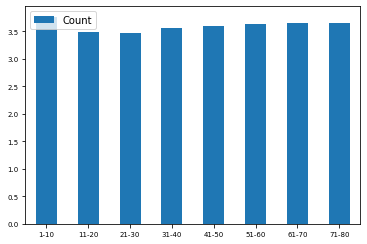

In [ ]:
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
data['age_group'] = pd.cut(data.age, range(0, 81, 10), right=False, labels=labels)

data.groupby('age_group').agg({'rating': [np.size, np.mean]})
A=[3.767442,3.486126,3.467333,3.554444,3.591772,3.635800,3.648875,3.649746]
ff = pd.DataFrame({'Count': A}, index=['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80'])
ax = ff.plot.bar(rot=0,fontsize=7)

# **職業&movies分析**
observation: 

solution:

result:

In [ ]:
#過濾掉評分數據不夠300條的電影
mean_ratings=data.pivot_table('rating',index=["title","item_id"],columns=["occupation"],aggfunc='mean')
#分組
ratings_by_title = data.groupby('title').size()
#數據過濾
active_titles = ratings_by_title.index[ratings_by_title >= 300]
#數據篩選
mean_ratings = mean_ratings.loc[active_titles]
print(mean_ratings[['student','doctor']])

occupation                                             student    doctor
title                                        item_id                    
Air Force One (1997)                         300      3.649351  4.000000
Back to the Future (1985)                    204      3.750000  4.000000
Chasing Amy (1997)                           246      3.918919       NaN
                                             268      3.846154  4.000000
Contact (1997)                               258      3.794872  4.000000
E.T. the Extra-Terrestrial (1982)            423      3.492308  3.000000
Empire Strikes Back, The (1980)              172      4.384615  5.000000
English Patient, The (1996)                  286      3.736111  4.600000
Fargo (1996)                                 100      3.936842  3.750000
Forrest Gump (1994)                          69       3.898551       NaN
Fugitive, The (1993)                         79       4.052632  5.000000
Full Monty, The (1997)                       269   

observation: 學生評分的人數最多, homemaker評分最少

solution: 按照順序用條列式排序

In [ ]:
occupation_count = users[["user_id", "occupation"]].groupby("occupation", as_index=False).size()  # count th
sorted_by_occupation = occupation_count.sort_values(by='size')
sorted_by_occupation[::-1][:20]

,occupation,size
18,student,196
13,other,105
3,educator,95
0,administrator,79
4,engineer,67
14,programmer,66
10,librarian,51
20,writer,45
6,executive,32
17,scientist,31


observation: 各職業的平均給分最高有3.8最低至3.3
solution: 利用.mean()算平均，用條列呈現

In [ ]:
users_df = users[['user_id', 'occupation']]
data_df = df[['user_id', 'rating']]

rating_df = pd.merge(users_df, data_df)

rating_df_mean = rating_df.groupby(['occupation', 'user_id']).mean()
#print(rating_df_mean)

occupation_rating = rating_df_mean.groupby(['occupation']).mean().sort_values(by='rating')
occupation_rating[::-1][:20]

,rating
occupation,
doctor,3.862104
engineer,3.674218
educator,3.666694
administrator,3.653328
programmer,3.636643
artist,3.619862
none,3.618920
librarian,3.609348
lawyer,3.597587


In [ ]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)[:10]
print(top_male_ratings["M"])

KeyError: ignored

# **Recommendation**

# **item based**

based將data分為train和test

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

Create two item matrices, one for training and another for testing

In [ ]:
import numpy as np

train_data_matrix = np.zeros((943, 1682))
for line in train_data.itertuples():
    #line[1]-1：user_id-1 / line[2]-1]:item_id-1 / line[3]:rating
    train_data_matrix[line[1]-1, line[2]-1] = line[3]  

test_data_matrix = np.zeros((943, 1682))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]


calculating Cosine value of Item-Item Similarity and prediction value 

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

def predict(ratings, similarity):
    pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred
    
item_prediction = predict(train_data_matrix, item_similarity)

#print(test_data_matrix)

Evaluating 均方根誤差(RMSE)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    #只對test_data中有評分的納入計算ground_truth.nonzero()(索引值) / 變成一維array .flatten() 
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

print ('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))
    

Item-based CF RMSE: 3.453295523246612


# **user based**
based將data分為train和test

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

Create two item matrices, one for training and another for testing

In [ ]:
import numpy as np

train_data_matrix = np.zeros((943, 1682))
for line in train_data.itertuples():
    #line[1]-1：user_id-1 / line[2]-1]:item_id-1 / line[3]:rating
    train_data_matrix[line[1]-1, line[2]-1] = line[3]  

test_data_matrix = np.zeros((943, 1682))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]


calculating Cosine value of User-User Similarity and prediction value 

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')

def predict(ratings, similarity):
    mean_user_rating = ratings.mean(axis=1)
    #You use np.newaxis so that mean_user_rating has same format as ratings
    ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
    pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    return pred
    
user_prediction = predict(train_data_matrix, user_similarity)

Evaluating 均方根誤差(RMSE)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    #只對test_data中有評分的納入計算ground_truth.nonzero()(索引值) / 變成一維array .flatten() 
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))


print ('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))

User-based CF RMSE: 3.125042691772117


Recommendation system observation:
1、Item-based精準度低於User-based
2、Item-based與User-based精準度皆不佳，原因可能為：資訊量不足夠